In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import latent_cause as lc
#from statsrat.expr.predef.pvl_iti import import extinction, blocking
from statsrat.expr.predef.pvl_no_iti import extinction, blocking
from statsrat.expr.predef.kitten import lrn_pred

In [2]:
print_probs = False # Should model log_lik, prior, phi etc. be printed?
model = lc.model()
print(model.pars)
trials = extinction.make_trials('experimental')
#trials = lrn_pred.make_trials()
# NEED TO MAKE SURE THAT TAU + 1 <= N + 2
# FIGURE OUT PARAMETERIZATION AND PARAMETER LIMITS
ds = model.simulate(trials, par_val = [1.1, 5, 5, 20, 1])

            min   max  default  \
prior_a     1.0  40.0      1.0   
prior_b     1.0  40.0      5.0   
gamma       0.0  10.0      2.0   
alpha       0.0  40.0      0.5   
resp_scale  0.0  10.0      1.0   

                                                  description  
prior_a     prior hyperparameter for eta (log-odds in Bern...  
prior_b     prior hyperparameter for eta (log-odds in Bern...  
gamma       decay rate for exponential SCRP; higher -> fav...  
alpha       concentration parameter; higher -> tend to inf...  
resp_scale         scales softmax/logistic response functions  


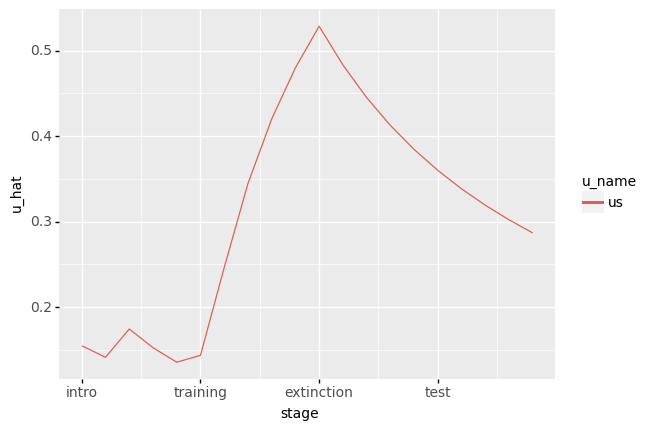

<ggplot: (308498077)>

In [3]:
#sr.learn_plot(ds, var = 'N')
sr.learn_plot(ds, var = 'u_hat')
#sr.learn_plot(ds, var = 'E_post_pred', sel = {'z_name': 0})
# *** MAKE IT SO THAT u_hat CAN BE ZERO AT FIRST,
# I.E. MAKE IT SO THAT THE PRIOR ON y CAUSES INITIAL PREDICTIONS TO BE SMALL ***
#sr.learn_plot(ds, var = 'u_hat', sel = {'t': ds['ex'].isin(['a.x', 'a.y'])*(ds['stage'] == 0)})

In [4]:
if print_probs:
    print('phi')
    print(ds['phi'].loc[{'t': range(5), 'z_name': range(3)}].values)
    print('\n E_log_prior')
    print(np.exp(ds['E_log_prior'].loc[{'t': range(5), 'z_name': range(3)}]).values)
    print('\n E_log_lik_x')
    print(np.exp(ds['E_log_lik_x'].loc[{'t': range(5), 'z_name': range(3)}]).values)
    print('\n E_log_lik_y')
    print(np.exp(ds['E_log_lik_y'].loc[{'t': range(5), 'z_name': range(3)}]).values)

In [6]:
trials = blocking.make_trials('experimental')
ds = model.simulate(trials, par_val = [2, 2, 0.01, 4, 5])

In [7]:
oat_result = sr.perform_oat(model, blocking, verbose = True, max_time = 30, minimize = True)
print(np.round(oat_result[0], 3))
print(np.round(oat_result[1], 3))

Maximizing OAT score.
[20.5 20.5  5.  20.   5. ]
[33.49933333 20.5         5.         20.          5.        ]
[ 7.50066667 20.5         5.         20.          5.        ]
[20.5        33.49933333  5.         20.          5.        ]
[20.5         7.50066667  5.         20.          5.        ]
[20.5        20.5         8.33266667 20.          5.        ]
[20.5        20.5         1.66733333 20.          5.        ]
[20.5        20.5         5.         33.33266667  5.        ]
[20.5        20.5         5.          6.66733333  5.        ]
[33.49933333 33.49933333  5.         20.          5.        ]
[33.49933333  7.50066667  5.         20.          5.        ]
[33.49933333 20.5         8.33266667 20.          5.        ]
[33.49933333 20.5         1.66733333 20.          5.        ]
[33.49933333 20.5         5.         33.33266667  5.        ]
[33.49933333 20.5         5.          6.66733333  5.        ]
[ 7.50066667 33.49933333  5.         20.          5.        ]
[ 7.50066667  7.50066

/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 2.62591667 20.5         8.33266667 33.33266667  5.        ]
[ 1.001      15.62525     8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 1.001      30.2495      8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 5.06329167 22.937375    8.33266667 33.33266667  5.        ]
[ 1.001      27.812125    8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 3.84460417 24.1560625   8.33266667 33.33266667  5.        ]
[ 3.84460417 14.4065625   8.33266667 33.33266667  5.        ]
[ 2.62591667 10.7505      8.33266667 33.33266667  5.        ]
[ 2.01657292  4.04771875  8.33266667 33.33266667  5.        ]
[ 1.001      10.14115625  8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 3.08292448 13.34021094  8.33266667 33.33266667  5.        ]
[ 2.47358073  1.001       8.33266667 33.33266667  5.        ]
[ 2.58783268 14.59698242  8.33266667 33.33266667  5.        ]
[ 1.52148112  5.30449023  8.33266667 33.33266667  5.        ]
[ 1.001       1.28662988  8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 1.001       1.001       8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 2.17842985  9.63654346  8.33266667 33.33266667  5.        ]
[ 1.68333805 10.89331494  8.33266667 33.33266667  5.        ]
[ 1.02638932  6.56126172  8.33266667 33.33266667  5.        ]
[ 1.001       5.02362085  8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 1.001       1.001       8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 1.47863664  8.41309546  8.33266667 33.33266667  5.        ]
[ 1.35486369  8.72728833  8.33266667 33.33266667  5.        ]
[ 1.27393522  5.93287598  8.33266667 33.33266667  5.        ]
[ 1.001       3.76684937  8.33266667 33.33266667  5.        ]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:200: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:219: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 1.04781156  5.00695911  8.33266667 33.33266667  5.        ]
[ 1.02638932  6.56126172  9.58241667 33.33266667  5.        ]
[ 1.02638932  6.56126172  9.58241667 38.33241667  5.        ]
[ 1.02638932  6.56126172  9.999      38.33241667  5.        ]
[ 1.02638932  6.56126172  9.999      39.999       5.        ]
[ 1.02638932  6.56126172  9.999      39.999       5.        ]
     prior_a  prior_b  gamma   alpha   mean  lower  upper
min    1.026    6.561  9.999  39.999 -0.084 -0.084 -0.084
max   33.045    1.001  0.001   3.074  0.000  0.000  0.000
       schedule      trial_name u_name  mean_resp parameters
0       control  cs2 -> nothing     us      0.813        min
0  experimental  cs2 -> nothing     us      0.896        min
0       control  cs2 -> nothing     us      0.992        max
0  experimental  cs2 -> nothing     us      0.991        max
